In [2]:
#import numpy as np, scipy as sp, seaborn as sns, csv, math, time, scipy.io, pandas as pd
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
!ls  -l ../figs/notMNIST/notMNIST_abstainvsacc_df.csv

-rw-r--r--  1 yoavfreund  staff  1084 May 20 19:44 ../figs/notMNIST/notMNIST_abstainvsacc_df.csv


## Performance and abstain probability as neighborhood size varies

In [6]:
plot_df2 = pd.read_csv('../figs/notMNIST/notMNIST_nbrsizes.csv', sep="\t")
plot_df2

,Neighborhood size,AKNN accuracy (A = 1.0),AKNN accuracy (A = 3.0),AKNN accuracy (A = 9.0),Cumulative fraction (A = 1.0),Cumulative fraction (A = 3.0),Cumulative fraction (A = 9.0),kNN accuracy
0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.862743
1,2.0,0.970174,NaN,NaN,0.838015,0.000000,0.000000,0.859859
2,3.0,0.970174,NaN,NaN,0.838015,0.000000,0.000000,0.874920
3,4.0,0.956671,NaN,NaN,0.887471,0.000000,0.000000,0.878285
4,5.0,0.945026,NaN,NaN,0.918073,0.000000,0.000000,0.883305
5,8.0,0.936187,NaN,NaN,0.935698,0.000000,0.000000,0.883465
6,11.0,0.930598,NaN,NaN,0.944990,0.000000,0.000000,0.883625
7,15.0,0.925569,0.988186,NaN,0.954337,0.732322,0.000000,0.882183
8,21.0,0.919902,0.974052,NaN,0.962828,0.802713,0.000000,0.879727
9,29.0,0.916101,0.963911,NaN,0.968223,0.828722,0.000000,0.877163


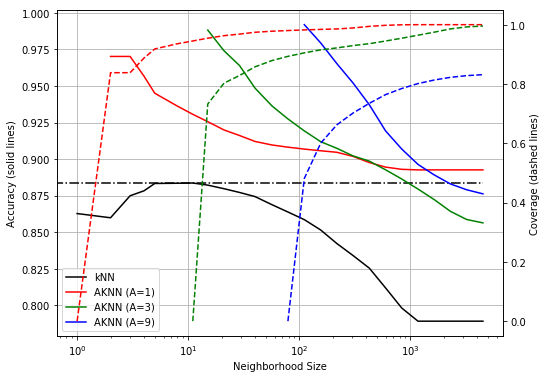

In [67]:
absc = plot_df2["Neighborhood size"]

color = 'tab:black'
fig, ax1 = plt.subplots(figsize=[8,6])
ax1.set_xlabel('Neighborhood Size')
ax1.set_ylabel('Accuracy (solid lines)')
#ax1.plot(t, data1, color=color)
#ax1.tick_params(axis='y')
ax1.plot(absc, plot_df2["kNN accuracy"], color='black')
ax1.hlines(np.max(plot_df2["kNN accuracy"]), xmin=0, xmax=np.max(absc),linestyles='-.')
ax1.plot(absc, plot_df2['AKNN accuracy (A = 1.0)'], color='red')
ax1.plot(absc, plot_df2['AKNN accuracy (A = 3.0)'], color='green')
ax1.plot(absc, plot_df2['AKNN accuracy (A = 9.0)'], color='blue')

plt.legend(['kNN', 'AKNN (A=1)', 'AKNN (A=3)', 'AKNN (A=9)'],loc=3)
color = 'tab:black'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Coverage (dashed lines)')  # we already handled the x-label with ax1

def trim_zeros(name,color='red'):
    cov=plot_df2[name]
    first=nonzero(cov)[0][0]
    plt.plot(absc[first-1:], cov[first-1:],'--', color=color)

trim_zeros('Cumulative fraction (A = 1.0)',color='red')
trim_zeros('Cumulative fraction (A = 3.0)',color='green')
trim_zeros('Cumulative fraction (A = 9.0)',color='blue')

ax2.tick_params(axis='y')

ax1.semilogx()
ax1.grid()
plt.show()


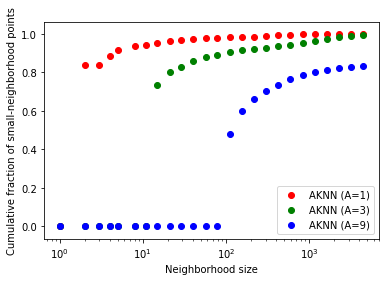

In [8]:
absc = plot_df2["Neighborhood size"]
plt.scatter(absc, plot_df2['Cumulative fraction (A = 1.0)'], color='red')
plt.scatter(absc, plot_df2['Cumulative fraction (A = 3.0)'], color='green')
plt.scatter(absc, plot_df2['Cumulative fraction (A = 9.0)'], color='blue')
#plt.colorbar(sc)
#plt.title("title")
plt.legend(['AKNN (A=1)', 'AKNN (A=3)', 'AKNN (A=9)'])
plt.xlabel("Neighborhood size")
plt.ylabel("Cumulative fraction of small-neighborhood points")
plt.semilogx()
plt.show()

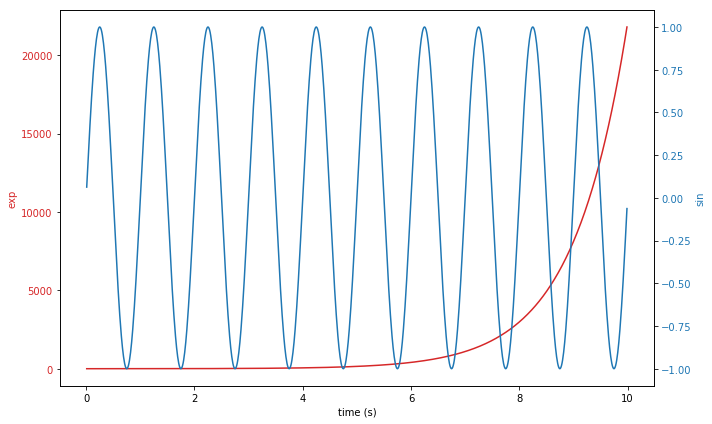

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize=[10,6])

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

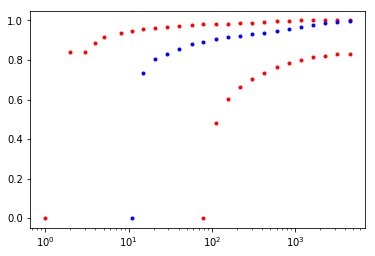

In [61]:
def trim_zeros(name,color='red'):
    cov=plot_df2[name]
    first=nonzero(cov)[0][0]
    plt.plot(absc[first-1:], cov[first-1:],'.', color=color)
    plt.semilogx()

trim_zeros('Cumulative fraction (A = 1.0)')
trim_zeros('Cumulative fraction (A = 3.0)',color='blue')
trim_zeros('Cumulative fraction (A = 9.0)')

In [55]:
first=nonzero(cov)[0][0]

In [57]:
cov[first-1]

0.0

In [68]:
np.max(plot_df2["kNN accuracy"])

0.8836252937406537

In [70]:
plot_df2['Cumulative fraction (A = 1.0)'].tail()

20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
Name: Cumulative fraction (A = 1.0), dtype: float64

In [71]:
plot_df2['AKNN accuracy (A = 1.0)'].tail()

20    0.892598
21    0.892598
22    0.892598
23    0.892598
24    0.892598
Name: AKNN accuracy (A = 1.0), dtype: float64